## Titanic Dataset (Survival Prediction)
#### Workflow stages
##### The solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Submit the results.
8. The workflow indicates general sequence of how each stage may follow the other; However there are use cases with exceptions.

We may combine mulitple workflow stages.
We may analyze by visualizing data.
Perform a stage earlier than indicated.
We may analyze data before and after wrangling.
Perform a stage multiple times in our workflow.
Visualize stage may be used multiple times.
Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.

### Problem Statement:
* We may also want to develop some early understanding about the domain of our problem. This is described on the Kaggle competition description page here. Here are the highlights to note.

* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
* One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

### Workflow goals
The data science solutions workflow solves for seven major goals.

* Classifying: We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

* Correlating: One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

* Converting: For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

* Completing: Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

* Correcting: We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

* Creating: Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

* Charting: How to select the right visualization plots and charts depending on nature of the data and the solution goals.

In [1]:
# Data Analysis and Wrangling
import numpy as np
import pandas as pd
import random as rnd

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine Learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Load Dataset
dtrain = pd.read_csv("Titanic_train.csv")
dtest = pd.read_csv("Titanic_test.csv")
# We combine these two datasets
combine = [dtrain,dtest]

In [3]:
# Description is given is dataset;DatasetAnalysing DataSet
# 1. Name of columns in dataset for classifying categorical and numeric features
print(dtrain.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


##### Categorical features:
* Sex, Survived, Embarked ; Ordinal-> Pclass

##### Numerical features:
* Continous = Age, fair
* Discrete = SibSp, Parch

In [4]:
dtrain.head()
# Name feature can be errornous as it may have type error
# Features like name, passengerId, cabin does not contribute as they are not unique 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dtest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Finding Null, blank and empty Values and Settling them
#1. Checking null values for all dataset  using .info()
dtrain.info()
print("_"*40)
#>> Age, Embarked and Cabin and 5 object, 5 int, 2 float
dtest.info()
#>> cabin, Age have empty and 6 object, 4 int , 2 floatd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
dtrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###### What is the distribution of categorical features?

* Names are unique across the dataset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).
* PassengerID is unique.
* Age: MAx audience was from age group of 30 year and 75% were of age 38.
* pclass is divided in 3 categories.
* Survived is binary(0/1)
* Fare can be ranging from 0-512, with 50% as 15USDand 75% as 31USD as rich people as 512USD.

##### Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

###### Correlating:
We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.
###### Completing:
We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.
###### Correcting:
Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.
###### Creating:
We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
We may want to engineer the Name feature to extract Title as a new feature.
We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
We may also want to create a Fare range feature if it helps our analysis.
###### Classifying:
We may also add to our assumptions based on the problem description noted earlier.

Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.


##### Analyze by pivoting features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

* Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
* Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
* SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [8]:
dtrain[["Pclass", "Survived"]].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
dtrain[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
dtrain[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
dtrain[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending= False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### Visualizing Data and Do Analysis:
##### Correlating numerical features
Let us start by understanding correlations between numerical features and our solution goal(Survived).
A histogram chart is useful for analyzing continous numerical variables like Age where grouping and ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands(groups). This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

##### Observations
* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

##### Decisions
This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

* We should consider Age (our assumption classifying #2) in our model training.
* Complete the Age feature for null values (completing #1).
* We should band age groups (creating #3).

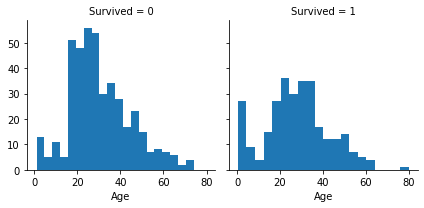

In [12]:
f1 = sns.FacetGrid(dtrain,col = 'Survived')
f1.map(plt.hist, 'Age', bins = 20)

##### Correlating numerical and ordinal features
* We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

###### Observations
* Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
* Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
* Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
* Pclass varies in terms of Age distribution of passengers.

###### Decisions
* Consider Pclass for model training.

C:\Users\dewan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


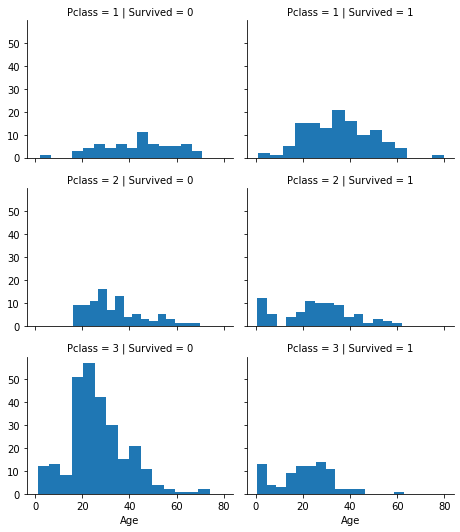

In [13]:
f2 = sns.FacetGrid(dtrain, col = 'Survived', row = 'Pclass', size = 2.5, aspect = 1.3)
f2.map(plt.hist, 'Age', bins =15)


###### Correlating categorical features
Now we can correlate categorical features with our solution goal.

###### Observations

* Female passengers had much better survival rate than males. Confirms classifying (#1).
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

###### Decisions.
* Add Sex feature to model training.
* Complete and add Embarked feature to model training.

C:\Users\dewan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\dewan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


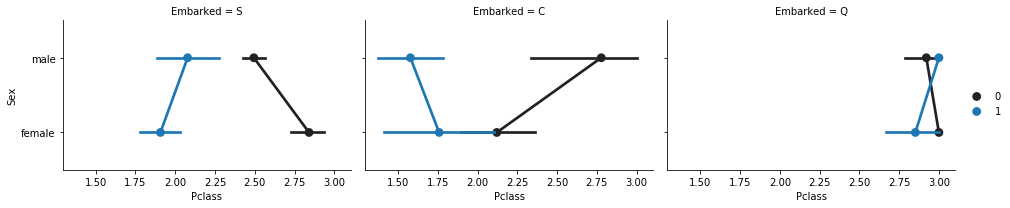

In [14]:
f3 = sns.FacetGrid(dtrain, col = "Embarked", aspect =1.5)
f3.map(sns.pointplot,'Pclass','Sex','Survived')
f3.add_legend()

##### Correlating categorical and numerical features
We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

##### Observations
* Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
* Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

##### Decisions

* Consider banding Fare feature.

C:\Users\dewan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


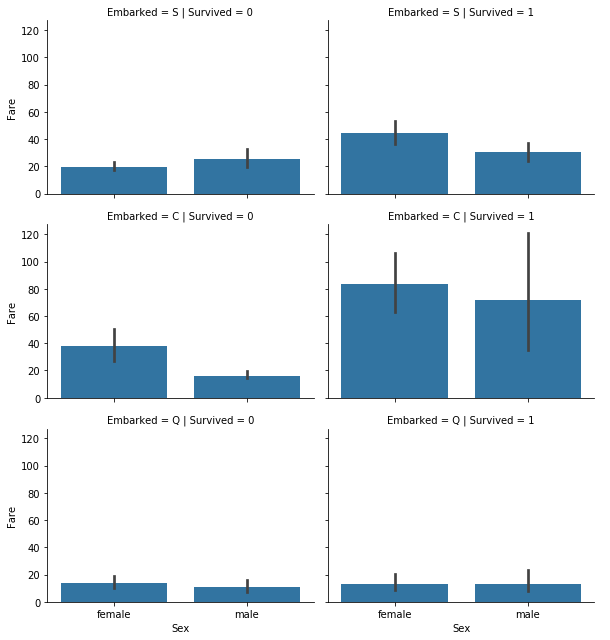

In [15]:
f4 = sns.FacetGrid(dtrain, row = 'Embarked', col = 'Survived', aspect = 1.4)
f4.map(sns.barplot, 'Sex','Fare')
f4.add_legend()

###### Wrangle data
We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

###### Correcting by dropping features
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin and Ticket features.

In [16]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
dtrain = dtrain.drop(['Ticket','Cabin'], axis = 1)
dtest = dtest.drop(['Ticket','Cabin'], axis = 1)
combine = [dtrain,dtest]

In [18]:
print(dtest.shape, dtrain.shape, combine[0].shape, combine[1].shape)

(418, 9) (891, 10) (891, 10) (418, 9)


##### Feature Engg
* We decide to manipulate Name and Passenger Id and replace them with Title that will help in modelling data.
* The title are extracted using Regex [[A-za/a]] ex type

In [19]:
for dataset in combine:
    dataset['Title']= dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)
pd.crosstab(dtrain['Title'], dtrain['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
# We can replace many title that seem worthless
for dataset in combine:
    dataset['Title']= dataset['Title'].replace(['Lady','Countess','Dr','Capt','Col','Don'
                                                ,'Jonkheer','Major','Rev','Sir', ],'Rare')
    dataset['Title']= dataset['Title'].replace('Mlle','Miss')
    dataset['Title']= dataset['Title'].replace('Ms','Miss')
    dataset['Title']= dataset['Title'].replace('Mme', 'Mrs')
dtrain[['Title','Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [21]:
# Converting Categorical into Ordinal Data
mapping = {'Master': 1, 'Miss': 2, 'Mr': 3, 'Mrs': 4, 'Rare': 5}
for dataset in combine:
    dataset['Title']= dataset['Title'].map(mapping) 
    dataset['Title']= dataset['Title'].fillna(0)
dtrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,3


In [22]:
# Now PassengerId and Name can be dropped safely as Title will be doing its deed:

dtrain = dtrain.drop(['Name','PassengerId'], axis = 1)
dtest = dtest.drop(['Name'], axis = 1)
combine = [dtrain,dtest]

In [23]:
# Coverting categorical variable from its string form to Numerical:

for dataset in combine:
    dataset['Sex']= dataset['Sex'].map({'male': 0, 'female' : 1})
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,3
1,1,1,1,38.0,1,0,71.2833,C,4
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,4
4,0,3,0,35.0,0,0,8.0500,S,3


##### Completing a Numerical continuous Feature
Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

###### We can consider three methods to complete a numerical continuous feature.
1. A simple way is to generate random numbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

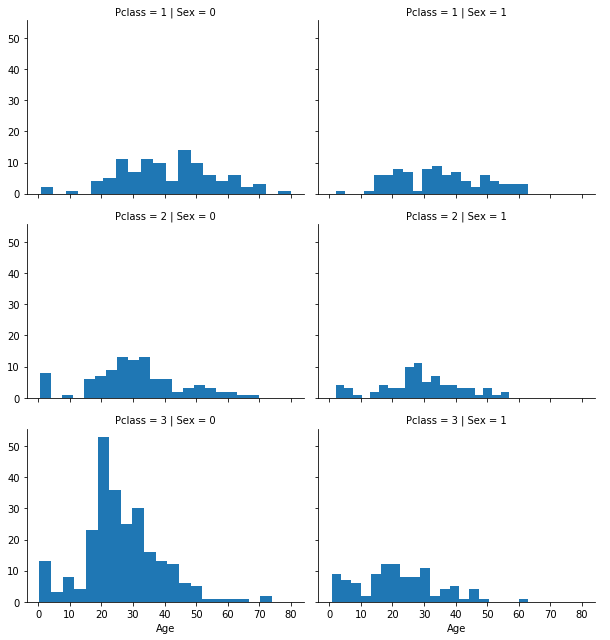

In [24]:
f5 = sns.FacetGrid(dtrain, row = 'Pclass', col = 'Sex', aspect = 1.4)
f5.map(plt.hist, 'Age',bins = 20 )
f5.add_legend()

##### Setting Empty array for Age & iterating random values for Sex(0/1) and Pclass(1/2/3)

In [25]:
guess_age = np.zeros((2,3))
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            df = dataset[(dataset['Sex']== i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_mean = df.mean()
            age_std = df.std()
            age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            age_guess = df.median()
            # Convert random age float to nearest .5 age
            guess_age[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_age[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,3
1,1,1,1,38,1,0,71.2833,C,4
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,4
4,0,3,0,35,0,0,8.0500,S,3


#### Creation of Age Groups(gap of 16 years) and convert to Ordinals

In [26]:
dtrain['AgeBand'] = pd.cut(dtrain['Age'],5 )
dtrain[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by ='AgeBand', ascending = True)
                                                                                         

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [27]:
# Replacing Values in Original Dataset to Ordinal values:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64 ,'Age'] = 4
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,3,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,4,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,4,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,3,"(32.0, 48.0]"


In [28]:
# Dropping AgeBand Feature
dtrain = dtrain.drop(['AgeBand'], axis=1)
combine = [dtrain, dtest]
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,3
1,1,1,1,2,1,0,71.2833,C,4
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,4
4,0,3,0,2,0,0,8.0500,S,3


### Creating New variable Family_Size will help us drop #parch and #SibSp variables

In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1
dtrain[['FamilySize','Survived']].groupby(['FamilySize'],as_index = False).mean().sort_values(by= 'Survived',ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


### Solving the problem of Single Person & measuring the survival rate, we create IsAlone Feature:

In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
dtrain[['IsAlone','Survived']].groupby(['IsAlone'], as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


### In count of IsAlone Feature; we can drop SibSp, Parch, FamilySize

In [31]:
dtrain = dtrain.drop(['Parch', 'SibSp', 'FamilySize'], axis =1)
dtest = dtest.drop(['FamilySize', 'SibSp', 'Parch'], axis =1)
combine = [dtrain,dtest]

dtrain.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,3,0
1,1,1,1,2,71.2833,C,4,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,4,0
4,0,3,0,2,8.0500,S,3,1


#### Completing a categorical feature
* Embarked feature takes S, Q, C values based on port of embarkation. 
* Our training dataset has two missing values. We simply fill these with the most common occurance.
* At Last converting it into Numerical Feature

In [32]:
freq_port = dtrain.Embarked.dropna().mode()[0]
print("freq_port")

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
dtrain[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


freq_port


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
dtrain.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,3,0
1,1,1,1,2,71.2833,1,4,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,4,0
4,0,3,0,2,8.0500,0,3,1


In [34]:
dataset['Embarked'].astype(int)

0      2
1      0
2      2
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Embarked, Length: 418, dtype: int32

### Feature Engineering of Fare:
We do this in a single line of code manipulating single lost value in fare using Mode.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [35]:
dtest['Fare'].fillna(dtest['Fare'].dropna().median(), inplace=True)

In [36]:
dtrain['FareBand'] = pd.cut(dtrain['Fare'], 4)
dtrain[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [37]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

dtrain = dtrain.drop(['FareBand'], axis=1)
combine = [dtrain, dtest]

In [38]:
dtest.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,3.0,1
1,893,3,1,2,0,0,4.0,0
2,894,2,0,3,1,2,3.0,1
3,895,3,0,1,1,0,3.0,1
4,896,3,1,1,1,0,4.0,0


## Model, predict and solve
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

1. Logistic Regression
2. KNN or k-Nearest Neighbors
3. Support Vector Machines
4. Naive Bayes classifier
5. Decision Tree
6. Random Forrest
7. Perceptron
8. Artificial neural network
9. RVM or Relevance Vector Machine

##### Data Train test split and X and Y sets.

In [39]:
X_train = dtrain.drop('Survived', axis = 1)
Y_train = dtrain['Survived']
X_test = dtest.drop('PassengerId', axis =1)

In [40]:
#1. Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
Acc_LG = round(logreg.score(X_train,Y_train) * 100, 2)
Acc_LG

C:\Users\dewan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.69

Logistic Regression helps to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

* Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
* Inversely as Pclass increases, probability of Survived=1 decreases the most.
* Title as second highest positive correlation.

In [41]:
cff = pd.DataFrame(dtrain.columns.delete(0))
cff.columns = ['Feature']
cff["Correlation"] = pd.Series(logreg.coef_[0])

cff.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.485520
4,Embarked,0.292082
6,IsAlone,0.091194
3,Fare,0.072311
5,Title,-0.098148
2,Age,-0.452126
0,Pclass,-1.104595


In [42]:
# 2. SupportVectorMachine
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
Acc_svc = round(svc.score(X_train, Y_train)*100, 2)
Acc_svc

C:\Users\dewan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


82.72

In [43]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
Acc_knn = round(knn.score(X_train,Y_train)*100,2)
Acc_knn

84.85

###### KNN confidence score is better than both Logistics Regression and SVM.

### Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

In [44]:
nbc = GaussianNB()
nbc.fit(X_train,Y_train)
Y_pred = nbc.predict(X_test)
Acc_nbc = round(nbc.score(X_train,Y_train)*100, 2)
Acc_nbc
# it performed poorly as compared to earliar models.

76.77

##### Perceptron
* The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [45]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
Acc_prp = round(perceptron.score(X_train, Y_train) * 100, 2)
Acc_prp

61.84

#### Decision Tree
* Decision tree as a predictive model which maps features (tree branches) to conclusions about the target(tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. 
* Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [46]:
D_tree = DecisionTreeClassifier()
D_tree.fit(X_train, Y_train)
Y_pred = D_tree.predict(X_test)
acc_tree = round(D_tree.score(X_train, Y_train) * 100, 2)
acc_tree

86.64

#### Random Forest Classifier
The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference Wikipedia.

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [47]:
rfc =  RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
Acc_rfc = round(rfc.score(X_train,Y_train)*100,2)
Acc_rfc

C:\Users\dewan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


86.53

### Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [48]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron','Decision Tree'],
    'Score': [Acc_svc, Acc_knn, Acc_LG, Acc_rfc, Acc_nbc, Acc_prp, acc_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,Decision Tree,86.64
3,Random Forest,86.53
1,KNN,84.85
0,Support Vector Machines,82.72
2,Logistic Regression,79.69
4,Naive Bayes,76.77
5,Perceptron,61.84


In [49]:
submission = pd.DataFrame({
        "PassengerId": dtest["PassengerId"],
        "Survived": Y_pred
    })

In [50]:
submission.to_csv('C:/Users/dewan/TitanicSurvival1.csv', index = False)